# Predicting Heart Disease

## Task and dataset description

The task is to predict whether a subject has heart disease based on 13 attributes. The "Heart Disease Data Set" can be found at https://archive.ics.uci.edu/ml/datasets/Heart+Disease. Each observation represents a subject, and there is a total of 303 observations. The following is a description of the attributes: 

1. age  
2. sex (1 = male; 0 = female) 
3. cp: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
4. restbps: resting blood pressure (in mm Hg on admission to the hospital) 
5. chol: serum cholesterol in mg/dl 
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
7. restecg: resting electrocardiographic results 
      --  0 = normal 
      --  1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
      --  2 = showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment  (1 = upsloping, 2 = flat, 3 = downsloping)
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal (3 = normal; 6 = fixed defect; 7 = reversable defect) 
14. number: diagnosis of heart disease (angiographic disease status) 
      -- 0: < 50% diameter narrowing (no heart disease) 
      -- 1-4: > 50% diameter narrowing  (heart disease)


In [0]:
#import libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve, f1_score, roc_auc_score

__author__ = "Estefy Fiallos"
__email__ = "estefy.b.fiallos@gmail.com"


## Load the data

In [15]:
#load the data into a Pandas dataframe
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header=None, names=columns)

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


##Data Quality Check

In [16]:
#look for missing values
df.isnull().any()

age        False
sex        False
cp         False
restbp     False
chol       False
fbs        False
restecg    False
thalach    False
exang      False
oldpeak    False
slope      False
ca         False
thal       False
num        False
dtype: bool

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null float64
cp         303 non-null float64
restbp     303 non-null float64
chol       303 non-null float64
fbs        303 non-null float64
restecg    303 non-null float64
thalach    303 non-null float64
exang      303 non-null float64
oldpeak    303 non-null float64
slope      303 non-null float64
ca         303 non-null object
thal       303 non-null object
num        303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [18]:
#Convert discrete features to integers

categorical_features=['sex','cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

encoders = dict() 

for i in categorical_features:
  encoders[i] = LabelEncoder()
  df[i] = encoders[i].fit_transform(df[i])
  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null int64
cp         303 non-null int64
restbp     303 non-null float64
chol       303 non-null float64
fbs        303 non-null int64
restecg    303 non-null int64
thalach    303 non-null float64
exang      303 non-null int64
oldpeak    303 non-null float64
slope      303 non-null int64
ca         303 non-null int64
thal       303 non-null int64
num        303 non-null int64
dtypes: float64(5), int64(9)
memory usage: 33.2 KB


In [19]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0,1,0
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3,0,2
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2,2,1
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0,0,0
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0,0,0


In [20]:
#Change target variable 'num' to binary: 0=no disease, 1=heart disease (instead of 1-4)

df.num = [1 if i > 0 else i for i in df.num]

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0,1,0
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3,0,1
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2,2,1
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0,0,0
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0,0,0


##Exploratory Data Analysis

In [21]:
df.shape

(303, 14)

In [22]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.716172,0.851485,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.005927,0.970282,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


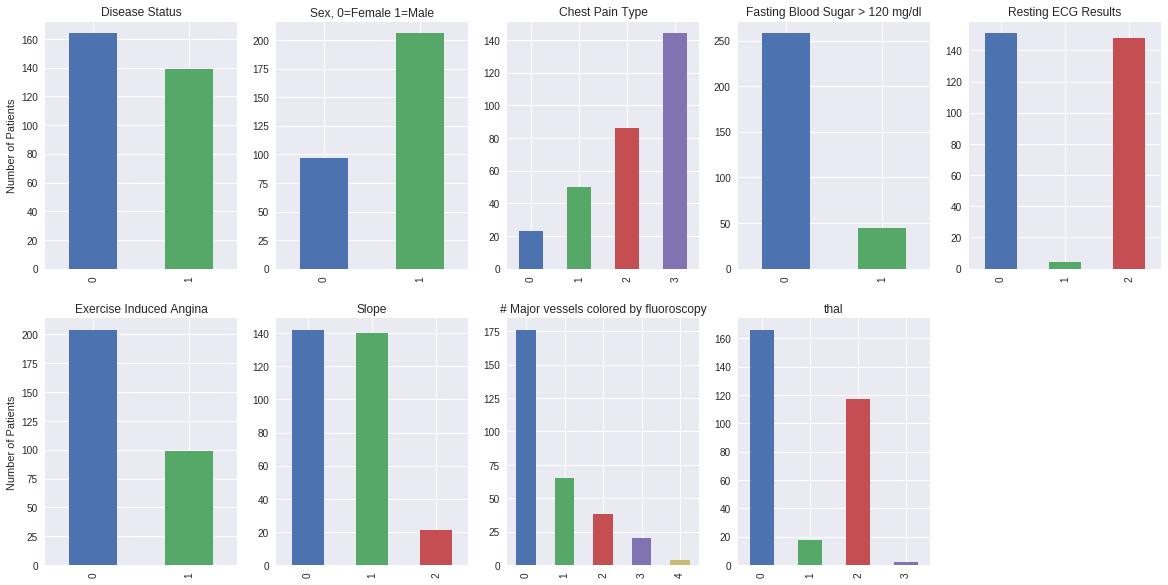

In [23]:
#Check distributions of discrete variables
plt.subplots(figsize=(20, 10))

plt.subplot(2,5,1)
df.num.value_counts(sort=False).plot(kind='bar', title = 'Disease Status')
plt.ylabel('Number of Patients')

plt.subplot(2,5,2)
df.sex.value_counts(sort=False).plot(kind='bar', title = 'Sex, 0=Female 1=Male')

plt.subplot(2,5,3)
df.cp.value_counts(sort=False).plot(kind='bar', title = 'Chest Pain Type')

plt.subplot(2,5,4)
df.fbs.value_counts(sort=False).plot(kind='bar', title = 'Fasting Blood Sugar > 120 mg/dl')

plt.subplot(2,5,5)
df.restecg.value_counts(sort=False).plot(kind='bar', title = 'Resting ECG Results')

plt.subplot(2,5,6)
df.exang.value_counts(sort=False).plot(kind='bar', title = 'Exercise Induced Angina')
plt.ylabel('Number of Patients')

plt.subplot(2,5,7)
df.slope.value_counts(sort=False).plot(kind='bar', title = 'Slope')                                       

plt.subplot(2,5,8)
df.ca.value_counts(sort=False).plot(kind='bar', title = '# Major vessels colored by fluoroscopy') 

plt.subplot(2,5,9)
df.thal.value_counts(sort=False).plot(kind='bar', title = 'thal') 

plt.show()

There is one more category than expected in "thal" and "ca". I will explore the original labels for these categories.

In [24]:
#Get original labels for 'ca'
list(encoders['ca'].classes_)

['0.0', '1.0', '2.0', '3.0', '?']

In [25]:
#Get original labels for 'thal'
list(encoders['thal'].classes_)

['3.0', '6.0', '7.0', '?']

It appears that there are missing values in "thal" and "ca" denoted by "?". Since there are only a few missing values, I will delete these rows.


In [26]:
df = df[df.thal != 3]
df = df[df.ca != 4]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age        297 non-null float64
sex        297 non-null int64
cp         297 non-null int64
restbp     297 non-null float64
chol       297 non-null float64
fbs        297 non-null int64
restecg    297 non-null int64
thalach    297 non-null float64
exang      297 non-null int64
oldpeak    297 non-null float64
slope      297 non-null int64
ca         297 non-null int64
thal       297 non-null int64
num        297 non-null int64
dtypes: float64(5), int64(9)
memory usage: 34.8 KB


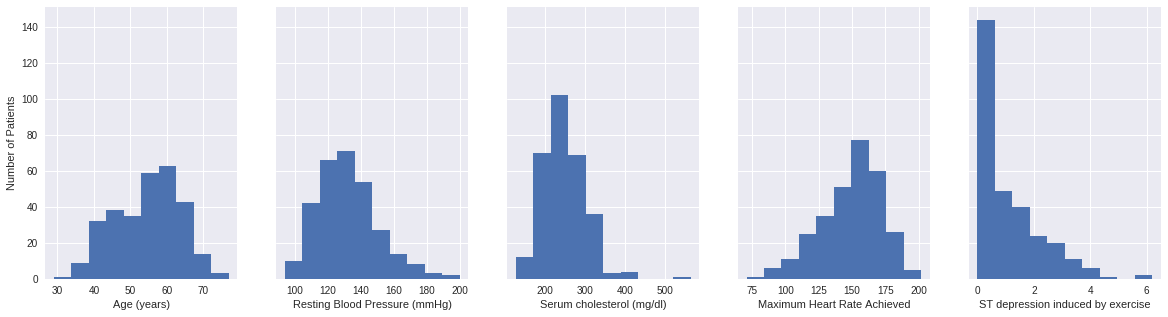

In [27]:
#Examine distributions of continuous variables
fig, axes = plt.subplots( nrows=1, ncols=5, sharey='row', figsize=(20,5))

axes[0].hist(df.age)
axes[0].set_xlabel("Age (years)")
axes[0].set_ylabel("Number of Patients")
axes[1].hist(df.restbp)
axes[1].set_xlabel('Resting Blood Pressure (mmHg)')
axes[2].hist(df.chol)
axes[2].set_xlabel("Serum cholesterol (mg/dl)")                  
axes[3].hist(df.thalach)
axes[3].set_xlabel("Maximum Heart Rate Achieved")
axes[4].hist(df.oldpeak)
axes[4].set_xlabel("ST depression induced by exercise")                   

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(30.307246093750003, 0.5, 'Number of Patients')

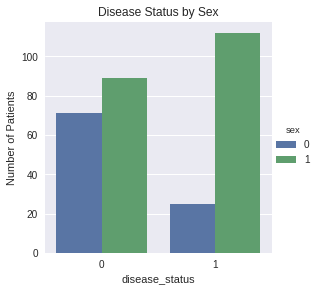

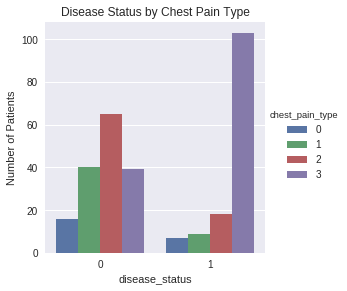

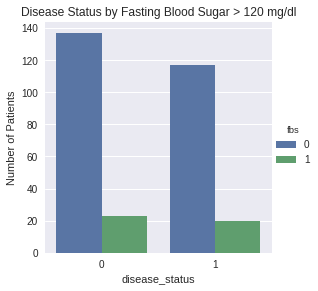

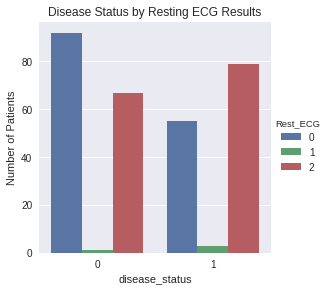

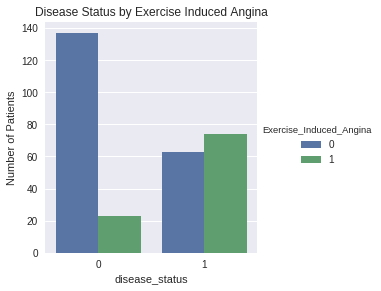

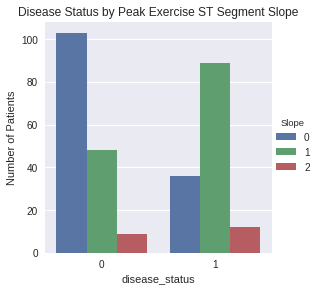

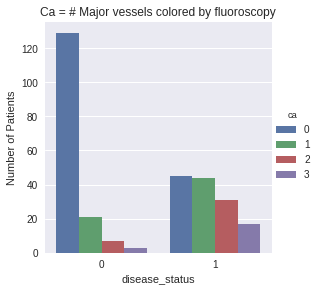

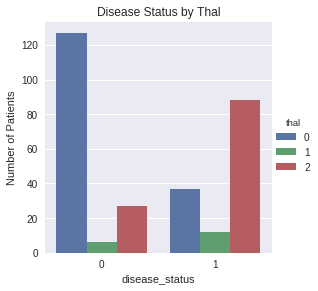

In [28]:
#Check distribution of discrete variables by disease status

sex_counts = df.groupby('num')['sex'].value_counts()
sex_df = pd.DataFrame([sex_counts.index.labels[0], sex_counts.index.labels[1], sex_counts.values], index = ['disease_status', 'sex', 'count'])
sex = sex_df.transpose()
sns.factorplot(x='disease_status', y='count', hue='sex', data=sex, kind='bar')
plt.title('Disease Status by Sex')
plt.ylabel('Number of Patients')

cp_counts = df.groupby('num')['cp'].value_counts()
cp_df = pd.DataFrame([cp_counts.index.labels[0], cp_counts.index.labels[1], cp_counts.values], index = ['disease_status', 'chest_pain_type', 'count'])
cp = cp_df.transpose()
sns.factorplot(x='disease_status', y='count', hue='chest_pain_type', data=cp, kind='bar')
plt.title('Disease Status by Chest Pain Type')
plt.ylabel('Number of Patients')

fbs_counts = df.groupby('num')['fbs'].value_counts()
fbs_df = pd.DataFrame([fbs_counts.index.labels[0], fbs_counts.index.labels[1], fbs_counts.values], index = ['disease_status', 'fbs', 'count'])
fbs = fbs_df.transpose()
sns.factorplot(x='disease_status', y='count', hue='fbs', data=fbs, kind='bar')
plt.title('Disease Status by Fasting Blood Sugar > 120 mg/dl')
plt.ylabel('Number of Patients')

restecg_counts = df.groupby('num')['restecg'].value_counts()
restecg_df = pd.DataFrame([restecg_counts.index.labels[0], restecg_counts.index.labels[1], restecg_counts.values], index = ['disease_status', 'Rest_ECG', 'count'])
restecg = restecg_df.transpose()
sns.factorplot(x='disease_status', y='count', hue='Rest_ECG', data=restecg, kind='bar')
plt.title('Disease Status by Resting ECG Results')
plt.ylabel('Number of Patients')

exang_counts = df.groupby('num')['exang'].value_counts()
exang_df = pd.DataFrame([exang_counts.index.labels[0], exang_counts.index.labels[1], exang_counts.values], index = ['disease_status', 'Exercise_Induced_Angina', 'count'])
exang = exang_df.transpose()
sns.factorplot(x='disease_status', y='count', hue='Exercise_Induced_Angina', data=exang, kind='bar')
plt.title('Disease Status by Exercise Induced Angina')
plt.ylabel('Number of Patients')

slope_counts = df.groupby('num')['slope'].value_counts()
slope_df = pd.DataFrame([slope_counts.index.labels[0], slope_counts.index.labels[1], slope_counts.values], index = ['disease_status', 'Slope', 'count'])
slope = slope_df.transpose()
sns.factorplot(x='disease_status', y='count', hue='Slope', data=slope, kind='bar')
plt.title('Disease Status by Peak Exercise ST Segment Slope')
plt.ylabel('Number of Patients')

ca_counts = df.groupby('num')['ca'].value_counts()
ca_df = pd.DataFrame([ca_counts.index.labels[0], ca_counts.index.labels[1], ca_counts.values], index = ['disease_status', 'ca', 'count'])
ca = ca_df.transpose()
sns.factorplot(x='disease_status', y='count', hue='ca', data=ca, kind='bar')
plt.title('Ca = # Major vessels colored by fluoroscopy')
plt.ylabel('Number of Patients')

thal_counts = df.groupby('num')['thal'].value_counts()
thal_df = pd.DataFrame([thal_counts.index.labels[0], thal_counts.index.labels[1], thal_counts.values], index = ['disease_status', 'thal', 'count'])
thal = thal_df.transpose()
sns.factorplot(x='disease_status', y='count', hue='thal', data=thal, kind='bar')
plt.title('Disease Status by Thal')
plt.ylabel('Number of Patients')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


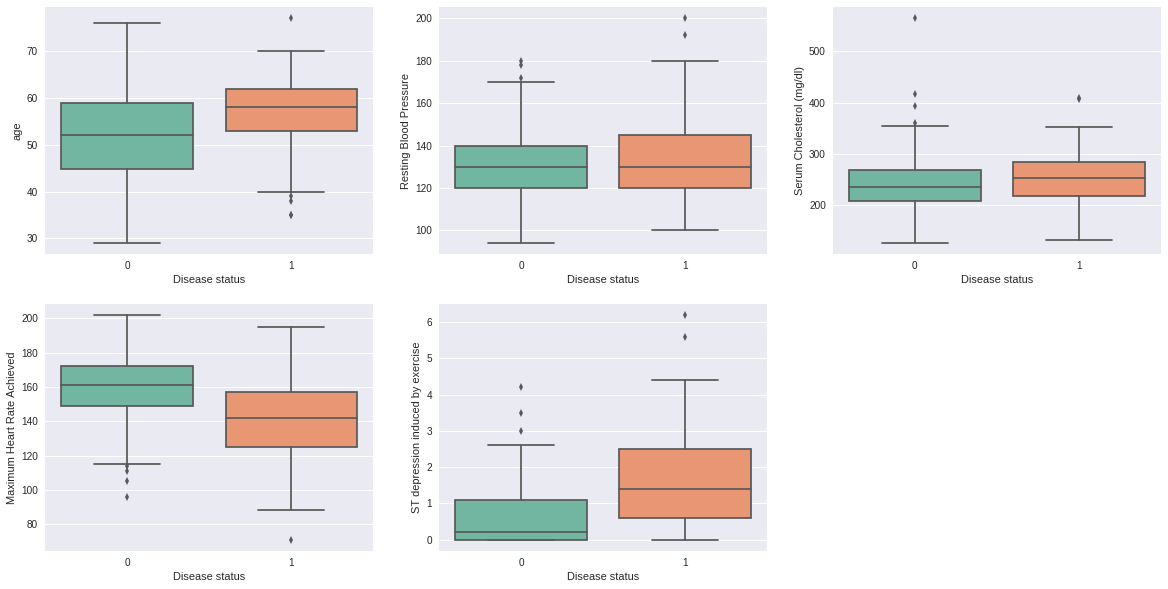

In [29]:
#Compare continuous features based on disease status 0=no disease 1=heart disease
plt.subplots(figsize=(20, 10))

plt.subplot(2,3,1)
sns.boxplot(x="num", y="age", data=df, palette="Set2")
plt.xlabel('Disease status')

plt.subplot(2,3,2)
sns.boxplot(x="num", y="restbp", data=df, palette="Set2")
plt.ylabel('Resting Blood Pressure')
plt.xlabel('Disease status')

plt.subplot(2,3,3)
sns.boxplot(x="num", y="chol", data=df, palette="Set2")
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.xlabel('Disease status')

plt.subplot(2,3,4)
sns.boxplot(x="num", y="thalach", data=df, palette="Set2")
plt.ylabel('Maximum Heart Rate Achieved')
plt.xlabel('Disease status')

plt.subplot(2,3,5)
sns.boxplot(x="num", y="oldpeak", data=df, palette="Set2")
plt.ylabel('ST depression induced by exercise')
plt.xlabel('Disease status')

plt.show()

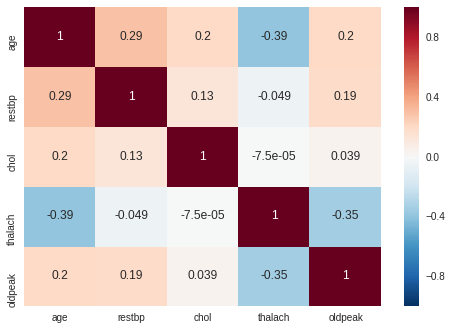

In [30]:
#Check for correlation between continuous features
num_var = ['age', 'restbp', 'chol', 'thalach', 'oldpeak']
sns.heatmap(df[num_var].corr(), annot=True)

##Pre-processing


In [31]:
#Change categorical variable to category type

df[categorical_features] = df[categorical_features].astype('category')

#Scale numeric variables

ss = dict() 

for i in num_var:
  ss[i] = StandardScaler()
  df[i] = ss[i].fit_transform(df[i].values.reshape(-1, 1))

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,1,0,0.750380,-0.276443,1,2,0.017494,0,1.068965,2,0,1,0
1,1.378929,1,3,1.596266,0.744555,0,2,-1.816334,1,0.381773,1,3,0,1
2,1.378929,1,3,-0.659431,-0.353500,0,2,-0.899420,1,1.326662,1,2,2,1
3,-1.941680,1,2,-0.095506,0.051047,0,0,1.633010,0,2.099753,2,0,0,0
4,-1.498933,0,1,-0.095506,-0.835103,0,2,0.978071,0,0.295874,0,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age        297 non-null float64
sex        297 non-null category
cp         297 non-null category
restbp     297 non-null float64
chol       297 non-null float64
fbs        297 non-null category
restecg    297 non-null category
thalach    297 non-null float64
exang      297 non-null category
oldpeak    297 non-null float64
slope      297 non-null category
ca         297 non-null category
thal       297 non-null category
num        297 non-null int64
dtypes: category(8), float64(5), int64(1)
memory usage: 29.5 KB



##Split Train/Test Set

In [0]:
X = df.iloc[:, :13]
y = df.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify = y)

##Modeling

###---K Nearest Neighbors Classifier---

In [34]:
knn = KNeighborsClassifier()

knn_result = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

knn_result.mean()

0.8059936786925685

In [35]:
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8666666666666667
[[27  5]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.83      0.89      0.86        28

   micro avg       0.87      0.87      0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



###---Logistic Regression---

In [36]:
lr = LogisticRegression()

lr_result = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')

lr_result.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.8356151711378355

In [37]:
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.85
[[26  6]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.89      0.85        28

   micro avg       0.85      0.85      0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###---Random Forest Classifier---

In [38]:
rf = RandomForestClassifier()

rf_result = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

rf_result.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

0.8020081714461919

In [39]:
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8833333333333333
[[29  3]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

   micro avg       0.88      0.88      0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


###Compare Model Performance with AUC curve

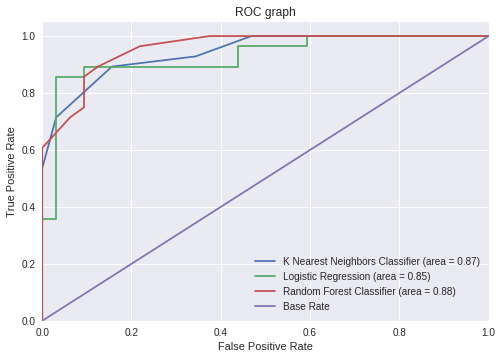

In [40]:
from sklearn.metrics import roc_curve
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
rf_auc = roc_auc_score(y_test, rf.predict(X_test))

knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
knn_auc = roc_auc_score(y_test, knn.predict(X_test))

plt.figure()

plt.plot(knn_fpr, knn_tpr, label = 'K Nearest Neighbors Classifier (area = %0.2f)' % knn_auc)
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression (area = %0.2f)' % lr_auc)
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest Classifier (area = %0.2f)' %rf_auc)

plt.plot([0,1], [0,1], label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title ('ROC graph')
plt.legend(loc='lower right')

plt.show()

Overall, the models performed similarly. The winner is the random forest classifier, but it's not likely that its performance is significantly different from the others. Nevertheless, I will try to tune the hyperparameters for the random forest classifier.

###Hyperparameter Tuning for Random Forest Classifier

In [41]:
tuned_parameters = [{'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150], 'max_features': ['auto', 'log2', None]}]
grid = GridSearchCV(rf, tuned_parameters, cv=5, scoring = "accuracy")  
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150], 'max_features': ['auto', 'log2', None]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
print(grid.best_params_)

{'max_features': 'auto', 'n_estimators': 110}


In [43]:
rf2 = RandomForestClassifier(n_estimators = 110)

rf2_result = cross_val_score(rf2, X_train, y_train, cv=5, scoring='accuracy')

rf2_result.mean()

0.814781837804502

In [45]:
rf2.fit(X_train, y_train)
predictions = rf2.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(roc_auc_score(y_test, predictions))

0.85
[[27  5]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.83      0.86      0.84        28

   micro avg       0.85      0.85      0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

0.8504464285714286


After hyperparameter tuning, the model did better on the training data but worse on the test data. There might be overfitting, so I'll use the original parameters. 

###Feature Importance

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


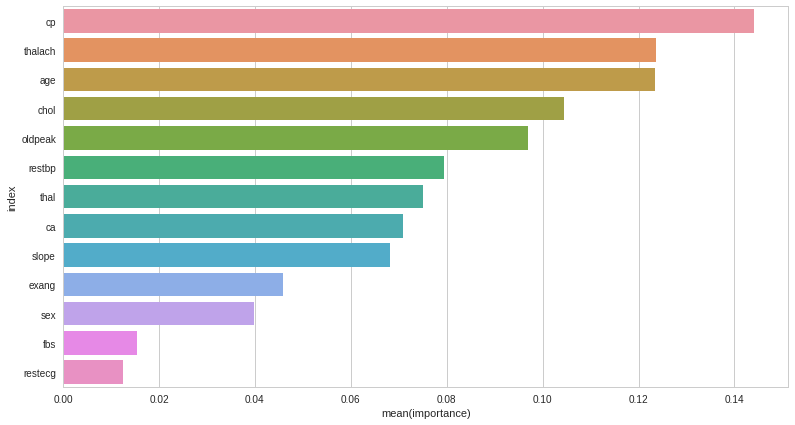

In [46]:
#Extract feature importance from Random Forest Classifier

feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(13, 7))

sns.barplot(x="importance", y='index', data=feature_importances, label='Total')

To understand which are the most important features, I will add a column of random noise to the data and check it's importance measure against the other features. 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


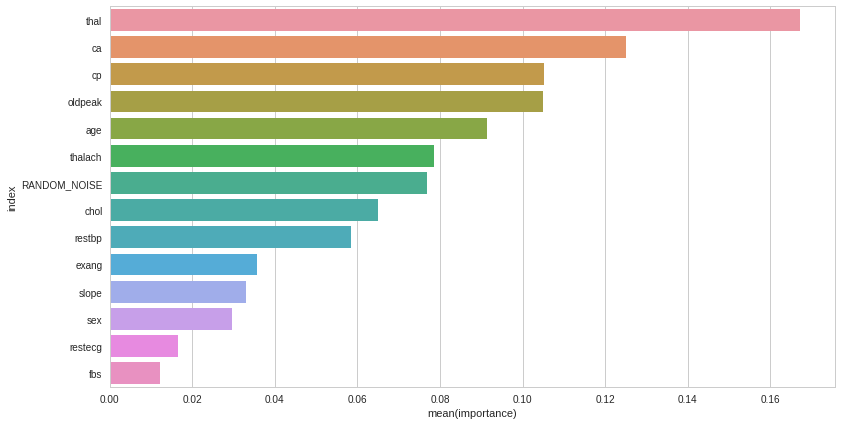

In [47]:
#Add a column of random noise and re-plot feature importance

X_train_rnoise = pd.DataFrame(X_train)
X_train_rnoise['RANDOM_NOISE'] = np.random.normal(0, 1, X_train_rnoise.shape[0])

rf_random = RandomForestClassifier()
rf_random = rf_random.fit(X_train_rnoise, y_train)

feature_importances_random = pd.DataFrame(rf_random.feature_importances_, index = X_train_rnoise.columns, columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_random = feature_importances_random.reset_index()

sns.set(style='whitegrid')

f, ax = plt.subplots(figsize=(13, 7))

sns.barplot(x="importance", y='index', data=feature_importances_random, label='Total')

I will consider everything above RANDOM_NOISE to be the most important features for the classification problem. These features include thal, ca, cp, oldpeak, age, and thalach. 

##Conclusion

The three models tested (K Nearest Neighbors, Logistic Regression, and Random Forest Classifier) performed similarly in the classification of heart disease with AUC scores of .87, .85, and .88, respectively. 

The most important feature appears to be "thal," but there's little information provided for this feature. Upon a quick google search, I suspect this may refer to a thallium stress test, which can be used to identify reversible and fixed heart defects. It is intuitive that a test that detects heart defects would be a good predictor of heart disease. "Ca," the number of major vessels colored by fluoroscopy, was the second-highest ranked feature. From the EDA, we can see that patients with heart disease are more likely to have major vessels colored by fluoroscopy. "Oldpeak" is the ST depression induced by exercise relative to rest, and it appears that higher ST depression is related to heart disease. In fact, ST depression is associated with cardiac ischemia and infarction (1). Finally, it appears that a lower value of "thalach," the maximum heart rate achieved, is associated with heart disease. 

1. T Pollehn, W J Brady, A D Perron, F Morris, The electrocardiographic differential diagnosis of ST segment depression. Emergency Medicine Journal 19, 129–135 (2002).